# Module 5 Exercises_3 (`for`-Loops)
Please use Module 5 and online references to complete the following exercises. Before you start, please run the following cell to load the libraries that we will need for our exercises.

In [1]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 

# we also need the mplot3d library to make 3D plots
from mpl_toolkits import mplot3d

# the next line allows plots to be displayed within a Jupyter notebook
# the command, preceded by a % sign, is known as a "magic" command
# and comments on the same line aren't allowed
%matplotlib inline

### Exercise 1 (Radioactive decay)
Radioactive decay is a *probabilistic* (or stochastic) process (as opposed to *deterministic*). What this means is that in any given time interval, an atom has a certain *probability* to decay into another atom, if it hasn't decayed yet. For example, carbon-14 can decay into nitrogen-14 through **beta decay**, and the half-life of carbon-14 is about 5,730 years (which means that one half of the existing carbon-14 atoms will have decayed into nitrogen-14 after 5,730 years). (Please look up **carbon dating** if you are interested.)

(a) Stochastic events can be simulated on a computer using **Monte Carlo** methods. The following steps can be used to simulate radioactive decay during one time step:
1. Create a list for the atoms (call it `atoms`). The length of the list is the number of atoms (`maxAtoms `; set it to 20 initially). The value of each element in the list corresponds to the state of the atom: it is 1 if it has not decayed, and 0 if it has decayed. Initialize all elements in `atoms` to 1. 
2. Create a `for` loop that runs through all elements in `atoms` and perform the following **Monte Carlo** simulation steps for each atom:
> * Generate a random number using `np.random.rand()`.
> * If this random number is less than the probability of dacay for an atom in one time step, then you assign a value of 0 to this atom (`atoms[m] = 0`); otherwise leave `atoms[m]` unchanged. (Of course you should create a variable name for this probability; set `prob = 0.1` initially.)

Run your code a few times and print `atoms` before and after the simulation to make sure the code works for several values of `maxAtoms` and `prob`.

In [13]:
#Exercise 1, Part (a) 

maxAtoms=20
atoms = [1] * maxAtoms
prob=0.1

for m in range(maxAtoms):
    rand = np.random.rand()
    if rand < prob:
        atoms[m] = 0
        
print(atoms)   

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


(b) To find out how the atoms decay with time, you need to create another `for` loop and insert the `for` loop in Part (a) inside the new `for` loop. (That is, create **nested** `for` loops.) The time loop should run `maxTime` number of steps; set `maxTime` to 10 initially. Please make sure that you use different index parameters for the two nested `for` loops, and please be careful with different levels of indentation for different loops. 

Add a new list to keep track of the total number of atoms that have not decaysed; call it `totalAtoms` and initialize all elements to `maxAtom` using the `np.ones` command. How many elements should this list contain? Add code to update `totalAtoms` at each time step. 

Make sure your code works properly for small values of `maxAtoms` and `maxTime` by using print statements. After the code works, comment out the print statements and set `maxAtoms = 1000` and `maxTime = 1000` for `prob = 1e-2`. 
* Make a plot of `totalAtoms` against time steps. 
* Also make a semi-log plot for this. (Look up how to do this if you are not familiar with it.) Does your semi-log plot look like a straight line? Why?

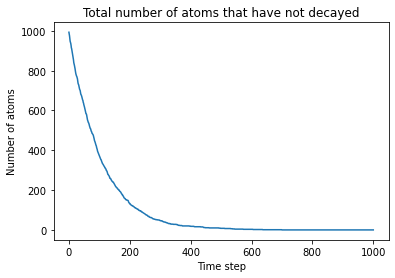

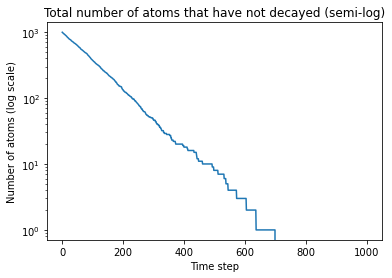

In [14]:
#Exercise 1, Part (b) 

import numpy as np
import matplotlib.pyplot as plt

maxAtoms = 1000  
prob = 1e-2    
maxTime = 1000  

atoms = np.ones(maxAtoms)

totalAtoms = np.ones(maxTime+1) * maxAtoms


for t in range(maxTime+1):
    for m in range(maxAtoms):
        rand = np.random.rand()
        if rand < prob:
            atoms[m] = 0
    totalAtoms[t] = np.sum(atoms)

plt.plot(range(maxTime+1), totalAtoms)
plt.title("Total number of atoms that have not decayed")
plt.xlabel("Time step")
plt.ylabel("Number of atoms")
plt.show()


plt.semilogy(range(maxTime+1), totalAtoms)
plt.title("Total number of atoms that have not decayed (semi-log)")
plt.xlabel("Time step")
plt.ylabel("Number of atoms (log scale)")
plt.show()


### Exercise 2 (Your brother's retirement saving)
When a bank offers a savings account that has a $5\%$ **annual interest rate**, **compounded monthly**, it will add an interest payment to your account at a rate of $0.05/12$ every month. Suppose you deposit $\$ 100.00$ on January 1, then your account balance on February 1, a month later, will be $\$ 100.00 \times (1+0.05/12)=\$ 100.42$. On March 1, you will have $\$100.42 \times (1+0.05/12)=\$ 100.84$, and so on so forth. Let's use this interest rate to calculate your savings if you make regular deposits into a retirement account for a period of time. 

(a) Suppose your brother puts $\$100.00$ into a retirement account on January 1, February 1, and March 1 (**3 deposits**), and you want to know his account balance 3 months later (on April 1). Create a NumPy list for the monthly `balance`, starting with the balance on January 1. How many elements are there in the list? Initialize all elements to 0, and then write computer code — no loop yet — to update the list, one element at a time. <div>
(**Hint**: Please note that on January 1, your balance should equal `deposit = 100`, but there is no interest earning; on April 1, there is a balance, but no deposit is made. In other words, the first month and the last month need to be handled differently than other in-between months.)

(b) If you have not done so, please create variable names for the following quantities: monthly interest rate (`rate`), deposit per month (`deposit`), and total months of making deposits (`savingMonths`). Initialize these variables at the top of your code, so that their numerical values can be changed easily.

(c) Convert your code in Parts (a-b) to a `for` loop, and make sure that the results of parts (a-b) and (c) agree. 

(d) Suppose your brother **starts saving for retirement at the age of 35** and continue until he **retires at 65**. Extend your calculation in part (c) so that `savingMonths` = $30\times12 = 360$. How much money does your brother have after saving $\$100.00$ per month for **30 years** at a $5\%$ annual rate (compounded monthly)? How much of that money is from the money he has put away (i.e., deposits), and how much is from interest earnings?

(**Answer**: Your brother will have $\$ 83,572.64$ in his retirement account when he turns 65.)

In [15]:
# Exercise 2, Parts (a-b)
balance = np.zeros(4)

balance[0] = 100.00

balance[1] = balance[0] * (1 + 0.05/12) + 100.00
balance[2] = balance[1] * (1 + 0.05/12) + 100.00
balance[3] = balance[2] * (1 + 0.05/12)

print(balance)

[100.         200.41666667 301.25173611 302.50695168]


In [5]:
# Exercise 2, Part (c)
rate = 0.05/12   
deposit = 100.00   
savingMonths = 3

In [40]:
# Exercise 2, Part (d)
# Part (a)
deposit = 100
rate = 0.05/12
savingMonths = 360

balance = np.zeros(savingMonths+1)
balance[0] = deposit

for i in range(1, savingMonths+1):
    balance[i] = balance[i-1] * (1+rate) + deposit

# (d)
total_deposit = deposit * savingMonths
total_earnings = balance[-1] - total_deposit

print(f"Total deposit: ${total_deposit:.2f}")
print(f"Total earnings: ${total_earnings:.2f}")
print(f"Total balance: ${balance[-1]:.2f}")

Total deposit: $36000.00
Total earnings: $47672.64
Total balance: $83672.64


### Exercise 3 (Your retirement saving, optional)
You, however, have a different saving strategy — you start retirement saving soon after you finish college. Suppose you **start at age 25** and **save for 15 years**, with a monthly deposit of $\$100.00$ and at an annual rate of $5\%$ (compounded monthly). After you reach 40, however, you stop putting more deposit into the account and just let the money grow by earning interests. 

(a) Modify your code from Exercise 2 to reflect this change in saving strategy. (Use a different variable name for your retirement balance.) How much money do you have when you turn 65? How much of that money is from the money you put away, and how much is from interest earnings? Comment on whether you would prefer your brother's strategy or yours.

(**Answer**: You will have $\$ 93,438.76$ when you turn 65.)

In [7]:
# Exercise 3



### Exercise 4 (optional)
Suppose we have a square of side length 1, and the square is divided into different zones (shown in gray and blue below). If we can throw N pebbles into the square randomly, with equal probability of landing anywhere, then our **theoretical prediction** is that the number of pebbles landing in each zone should be proportional to the area of the zone. Let's test this prediction.

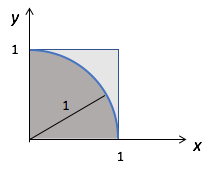

(a) For this exercise, we will write a `for`-loop to perform the following tasks $N$ times:
* Generate an x and a y coordinate for a pebble in the square using NumPy's random number generator `np.random.rand`twice. 
* Since both $x$ and $y$ are positive, the pebble will "land" somewhere in a square region with an area $A = 1^2=1$, as shown above. Determine whether the pebble has "landed" in the circular area using a logical test. This zone is a quarter of a circle with an area $A_c = \pi \cdot 1^2/4=\pi /4$. (Hint: If the pebble lands inside the circle, its distance $r$ to the origin $(0,0)$ is less than 1; $r^2=x^2+y^2$.)

(b) We also want to count the total number of pebbles that land within a distance $r=1$ to the origin to test our theoretical prediction. Add this counter to your `for`-loop if you don't have one yet.

Let's use $N_c$ to denote the number of pebbles landing in the area $A_c$. Since

$$\frac{N_c}{N} = \frac{A_c}{A}=\frac{\pi/4}{1},$$

we get

$$\pi = 4\frac{N_c}{N}.$$

(Of course this relationship is true only when $N \to \infty $.) 

(c) Conduct a computer experiment to see how close $4 N_c/N$ is to $\pi$ when <div>
* (i) $N = 10^2$, 
* (ii) $N = 10^4$, 
* (iii) $N = 10^6$. 

Please also calculate the **fractional error** $(4 N_c/N - \pi)/\pi$.

(d) Do another run for $N = 10^3$, and plot the positions of all pebbles to see where they have landed. Also plot the quarter-circle given by $r=1$. 

**Optional:** Mark the pebbles within the circle with a different color. 

In [8]:
# Exercise 4, Parts (a-c)


In [9]:
# Exercise 3, Part (d) 
